In [8]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from statistics import stdev
matplotlib.use('Agg')
%matplotlib inline


In [9]:
data = pd.read_csv('exp_beer.csv')
df_beer = data.iloc[:, [1]]
df_b_beer = data.iloc[:, [2]]
#print(df_beer)
df_b_beer.head()

,B-Prime
0,578
1,1000
2,188
3,144
4,640


Prime:  775.5  SD:  412.93966468076985   B_Prime:  573.0  SD:  390.7576685818918


Ttest_relResult(statistic=3.1520866456204724, pvalue=0.01169820303355057)

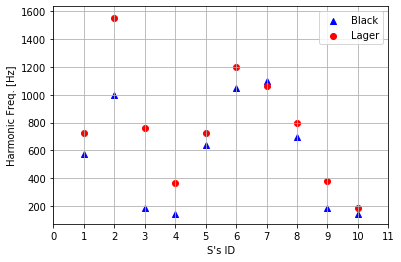

In [10]:
data.head()
np.mean(data)

from scipy import stats
import csv
prime = []
b_prime = []
idval = []
with open('exp_beer.csv') as f:
    
    for row in f:
        primedata = row.split(',')
        int_id = primedata[0]
        int_primedata = primedata[1]
        int_b_primedata = primedata[2]
        idval.append(int_id)
        prime.append(int_primedata)
        b_prime.append(int_b_primedata.rstrip())
        
        #print(prime)
del idval[0]
del idval[-1]
del prime[0]
del prime[-1]
del b_prime[0]
del b_prime[-1]

ids = [int(s) for s in idval]
primebeer = [int(s) for s in prime]
b_primebeer = [int(s) for s in b_prime]
#print(prime)
#print(b_prime)
plt.scatter(ids, b_primebeer, marker='^', c='blue', label='Black')
plt.scatter(ids, primebeer, marker='o', c='red', label='Lager')
plt.legend(loc='upper right')
plt.xlabel('S\'s ID')
plt.ylabel('Harmonic Freq. [Hz]')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.grid()
#plt.savefig('fig_beer.png')
#fig.show()
avg_primebeer = sum(primebeer) / len(primebeer)
avg_b_primebeer = sum(b_primebeer) / len(b_primebeer)
stdev_primebeer = stdev(primebeer)
stdev_b_primebeer = stdev(b_primebeer)

print('Prime: ', avg_primebeer, ' SD: ', stdev_primebeer, '  B_Prime: ', avg_b_primebeer, ' SD: ', stdev_b_primebeer)
stats.ttest_rel(primebeer, b_primebeer)

In [16]:
mstdata = pd.read_csv('mst.csv')
first_drunk = mstdata[mstdata['alc'] > 0]
fd_pc = first_drunk.iloc[:, [2]]  #first_drunk_percent_correct
fd_pc_s = first_drunk.iloc[:, [5]] #second_data

li_fd_pc = list(fd_pc.values.flatten())
li_fd_pc_s = list(fd_pc_s.values.flatten())

#fd_pc.head()

stats.ttest_rel(li_fd_pc, li_fd_pc_s) #最初に飲酒した群の1回目と2回目に差があるか

Ttest_relResult(statistic=1.4057614115217347, pvalue=0.20259436615717236)

In [12]:
second_drunk = mstdata[mstdata['alc_second'] > 0]
sd_pc = second_drunk.iloc[:, [2]] #second_drunk_percent_correct
sd_pc_s = second_drunk.iloc[:, [5]] #second_data

li_sd_pc = list(sd_pc.values.flatten())
li_sd_pc_s = list(sd_pc_s.values.flatten())

stats.ttest_rel(li_sd_pc, li_sd_pc_s) #2回目に飲酒した群の1回目と2回目に差があるか

Ttest_relResult(statistic=-1.1888314763821866, pvalue=0.27941927344836964)

FirstDrunk-AUDIT: 6.75  SD: 5.74
SecondDrunk-AUDIT: 6.142857142857143  SD: 6.08


ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

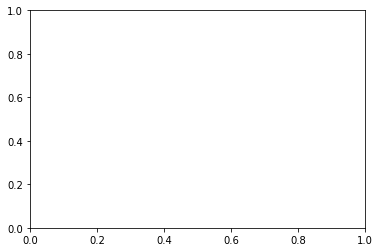

In [15]:
fd_audit = first_drunk.iloc[:, [7]] #first_drunk_audit
sd_audit = second_drunk.iloc[:, [7]] #second_drunk_audit

li_fd_audit = list(fd_audit.values.flatten())
li_sd_audit = list(sd_audit.values.flatten())

avg_fd_audit = sum(li_fd_audit) / len(li_fd_audit) #average_fd_audit
avg_sd_audit = sum(li_sd_audit) / len(li_sd_audit) #average_sd_audit

stdev_fd_audit = stdev(li_fd_audit)
stdev_sd_audit = stdev(li_sd_audit)

print('FirstDrunk-AUDIT: ' + str(avg_fd_audit)+ '  SD: {0:.2f}'.format(stdev_fd_audit) + '\nSecondDrunk-AUDIT: ' + str(avg_sd_audit) + '  SD: {0:.2f}'.format(stdev_sd_audit)) #1回目と2回目の飲酒群にAUDITの差があるか

#plt.(li_fd_audit, li_sd_audit)
stats.ttest_ind(li_fd_audit, li_sd_audit, equal_var=False)
#stats.bartlett(li_fd_audit, li_sd_audit)
#stats.shapiro()

In [10]:
exp_first_time = mstdata.iloc[:, [10]]
exp_second_time = mstdata.iloc[:, [11]]

li_ef_t = list(exp_first_time.values.flatten()) #exp-1-starts-time
li_es_t = list(exp_second_time.values.flatten()) #exp-2-starts-time

avg_ef_t = sum(li_ef_t) / len(li_ef_t)
avg_es_t = sum(li_es_t) / len(li_es_t)

stdev_ef_t = stdev(li_ef_t)
stdev_es_t = stdev(li_es_t)

print('exp-one-time: ' + str(avg_ef_t) + '  SD: {0:.2f}'.format(stdev_ef_t) + '\nexp-two-time: ' + str(avg_es_t) + '  SD: {0:.2f}'.format(stdev_es_t)) #1回目と2回目の実験の開始時刻に差があるか

exp-one-time: 15.466666666666667  SD: 1.81
exp-two-time: 15.433333333333334  SD: 2.44


In [32]:
fd_alc = first_drunk.iloc[:, [8]] #first_drunk_alcohol
sd_alc = second_drunk.iloc[:, [9]] #second_drunk_alcohol

li_fd_alc = list(fd_alc.values.flatten())
li_sd_alc = list(sd_alc.values.flatten()) #正規分布ではないくさい

avg_fd_alc = sum(li_fd_alc) / len(li_fd_alc)
avg_sd_alc = sum(li_sd_alc) / len(li_sd_alc)

stdev_fd_alc = stdev(li_fd_alc)
stdev_sd_alc = stdev(li_sd_alc)

print('fd-average-alcohol: ' + str(avg_fd_alc) + '  SD: {0:.2f}'.format(stdev_fd_alc)+ '\nsd-average-alcohol: ' + str(avg_sd_alc) + '  SD: {0:.2f}'.format(stdev_sd_alc))
stats.mannwhitneyu(li_fd_alc, li_sd_alc, alternative='two-sided') #F検定p=0.043より等分散
stats.levene(li_fd_alc, li_sd_alc)
#stats.ttest_ind(li_fd_alc, li_sd_alc, equal_var=False)

fd-average-alcohol: 34.599999999999994  SD: 50.34
sd-average-alcohol: 15.200000000000001  SD: 19.16


LeveneResult(statistic=0.3660959030945744, pvalue=0.5555552859151149)

In [12]:
exp_first_bias = mstdata.iloc[:, [4]] #bias of first experiment -all
exp_second_bias = mstdata.iloc[:, [6]] #bias of second experiment -all

li_ef_bias = list(exp_first_bias.values.flatten())
li_es_bias = list(exp_second_bias.values.flatten())


avg_ef_bias= sum(li_ef_bias) / len(li_ef_bias)
avg_es_bias = sum(li_es_bias) / len(li_es_bias)

stdev_ef_bias = stdev(li_ef_bias)
stdev_es_bias = stdev(li_es_bias)

print('exp 1 average-bias: ' + str(avg_ef_bias) + '  SD: {0:.2f}'.format(stdev_ef_bias)+ '\nexp 2 average-bias: ' + str(avg_es_bias) + '  SD: {0:.2f}'.format(stdev_es_bias))
stats.ttest_rel(li_ef_bias, li_es_bias)


exp 1 average-bias: 23.291333333333334  SD: 13.21
exp 2 average-bias: 19.040666666666663  SD: 17.16


Ttest_relResult(statistic=1.3749003135010363, pvalue=0.190768270584416)

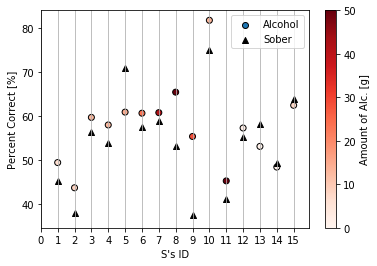

In [13]:
cond_data = pd.read_csv('condition.csv')

li_ids = list(cond_data.iloc[:, [0]].values.flatten())
li_alc = list(cond_data.iloc[:, [2]].values.flatten())
li_sober = list(cond_data.iloc[:, [3]].values.flatten())
li_amount_alc = list(cond_data.iloc[:, [1]].values.flatten())

#plt.plot(li_ids, li_alc, ls=':', c='r')
plt.scatter(li_ids, li_alc, c=li_amount_alc, edgecolors='k', cmap='Reds', vmin=0, vmax=50, label='Alcohol')
plt.colorbar().set_label('Amount of Alc. [g]')
plt.grid(axis='x')
plt.scatter(li_ids, li_sober, marker='^', c='Black', label='Sober')
plt.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, ])
plt.xlabel('S\'s ID')
plt.ylabel('Percent Correct [%]')
plt.savefig('fig_mst.png')

In [24]:

avg_alc_pc= sum(li_alc) / len(li_alc)
avg_sob_pc = sum(li_sober) / len(li_sober)

stdev_alc_pc = stdev(li_alc)
stdev_sob_pc = stdev(li_sober)

print('Alcohol-condition correct average: ' + str(avg_alc_pc) + '  SD: {0:.2f}'.format(stdev_alc_pc)+ '\nSober-condition correct average: ' + str(avg_sob_pc) + '  SD: {0:.2f}'.format(stdev_sob_pc))

stats.ttest_rel(li_alc, li_sober)
stats.wilcoxon(li_alc, li_sober, correction=True)


Alcohol-condition correct average: 57.48199999999998  SD: 9.32
Sober-condition correct average: 54.27933333333333  SD: 10.91


WilcoxonResult(statistic=26.0, pvalue=0.057033256194025425)

In [153]:
#まきお、れんくん、つばさのデータを除く
mstdata = pd.read_csv('mst.csv')
dm_mstdata = mstdata.drop([5, 9])
first_drunk = dm_mstdata[dm_mstdata['alc'] > 0]
fd_pc = first_drunk.iloc[:, [2]]  #first_drunk_percent_correct
fd_pc_s = first_drunk.iloc[:, [5]] #second_data

li_fd_pc = list(fd_pc.values.flatten())
li_fd_pc_s = list(fd_pc_s.values.flatten())

fd_correct_ans = stats.ttest_rel(li_fd_pc, li_fd_pc_s)
print('1回目飲酒群の正解率に違いは有るか\n', fd_correct_ans)

dm_mstdata.head(8)

second_drunk = dm_mstdata[dm_mstdata['alc_second'] > 0]
sd_pc = second_drunk.iloc[:, [2]] #second_drunk_percent_correct
sd_pc_s = second_drunk.iloc[:, [5]] #second_data

li_sd_pc = list(sd_pc.values.flatten())
li_sd_pc_s = list(sd_pc_s.values.flatten())

sd_correct_ans = stats.ttest_rel(li_sd_pc, li_sd_pc_s) #2回目に飲酒した群の1回目と2回目に差があるか
print('2回目飲酒群の正解率に違いは有るか\n', sd_correct_ans)

1回目飲酒群の正解率に違いは有るか
 Ttest_relResult(statistic=3.7876895182572294, pvalue=0.009097976256318644)
2回目飲酒群の正解率に違いは有るか
 Ttest_relResult(statistic=-1.6332113037666527, pvalue=0.16335275328337495)


In [15]:
sa = np.array(li_alc) - np.array(li_sober)
li_sa = sa.tolist()
#print(sa)

df_sa = pd.Series(sa)
print(df_sa)

def replace_outlier(series, bias=1.5):
    #四分位数
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1

    #外れ値の基準点
    outlier_min = q1 - (iqr) * bias
    outlier_max = q3 + (iqr) * bias

    print("outlier_min :" + str(outlier_min) + ", outlier_max :" + str(outlier_max))

    #外れ値をクリップする
    series = series.clip(outlier_min, outlier_max)
    return series

rm_outlier_sa =  replace_outlier(df_sa)
print(rm_outlier_sa)

0      4.16
1      5.73
2      3.24
3      4.18
4     -9.99
5      3.05
6      1.88
7     12.25
8     17.87
9      6.81
10     4.16
11     2.08
12    -5.00
13    -1.03
14    -1.35
dtype: float64
outlier_min :-6.369999999999996, outlier_max :11.749999999999995
0      4.16
1      5.73
2      3.24
3      4.18
4     -6.37
5      3.05
6      1.88
7     11.75
8     11.75
9      6.81
10     4.16
11     2.08
12    -5.00
13    -1.03
14    -1.35
dtype: float64


In [33]:
rm_cond_data = cond_data.drop([4,7,8])
rm_cond_data.head(12)


rm_li_ids = list(rm_cond_data.iloc[:, [0]].values.flatten())
rm_li_alc = list(rm_cond_data.iloc[:, [2]].values.flatten())
rm_li_sober = list(rm_cond_data.iloc[:, [3]].values.flatten())
rm_li_amount_alc = list(rm_cond_data.iloc[:, [1]].values.flatten())


rm_avg_alc_pc= sum(rm_li_alc) / len(rm_li_alc)
rm_avg_sob_pc = sum(rm_li_sober) / len(rm_li_sober)

rm_stdev_alc_pc = stdev(rm_li_alc)
rm_stdev_sob_pc = stdev(rm_li_sober)

print('Alcohol-condition correct average(rm): ' + str(rm_avg_alc_pc) + '  SD: {0:.2f}'.format(rm_stdev_alc_pc)+ '\nSober-condition correct average(rm): ' + str(rm_avg_sob_pc) + '  SD: {0:.2f}'.format(rm_stdev_sob_pc))

rm_mstdata = pd.read_csv('mst.csv').drop([0, 5, 10])
rm_first_drunk = rm_mstdata[rm_mstdata['alc'] > 0]
rm_second_drunk = rm_mstdata[rm_mstdata['alc_second'] > 0]

rm_fd_audit = rm_first_drunk.iloc[:, [7]] #first_drunk_audit
rm_sd_audit = rm_second_drunk.iloc[:, [7]] #second_drunk_audit

rm_li_fd_audit = list(rm_fd_audit.values.flatten())
rm_li_sd_audit = list(rm_sd_audit.values.flatten())

rm_avg_fd_audit = sum(rm_li_fd_audit) / len(rm_li_fd_audit) #average_fd_audit
rm_avg_sd_audit = sum(rm_li_sd_audit) / len(rm_li_sd_audit) #average_sd_audit

rm_stdev_fd_audit = stdev(rm_li_fd_audit)
rm_stdev_sd_audit = stdev(rm_li_sd_audit)

print('FirstDrunk-AUDIT(rm): ' + str(rm_avg_fd_audit)+ '  SD: {0:.2f}'.format(rm_stdev_fd_audit) + '\nSecondDrunk-AUDIT(rm): ' + str(rm_avg_sd_audit) + '  SD: {0:.2f}'.format(rm_stdev_sd_audit)) #1回目と2回目の飲酒群にAUDITの差があるか

rm_fd_alc = rm_first_drunk.iloc[:, [8]] #first_drunk_alcohol
rm_sd_alc = rm_second_drunk.iloc[:, [9]] #second_drunk_alcohol

rm_li_fd_alc = list(rm_fd_alc.values.flatten())
rm_li_sd_alc = list(rm_sd_alc.values.flatten()) #正規分布ではないくさい

rm_avg_fd_alc = sum(rm_li_fd_alc) / len(rm_li_fd_alc)
rm_avg_sd_alc = sum(rm_li_sd_alc) / len(rm_li_sd_alc)

rm_stdev_fd_alc = stdev(rm_li_fd_alc)
rm_stdev_sd_alc = stdev(rm_li_sd_alc)

print('fd-average-alcohol(rm): ' + str(rm_avg_fd_alc) + '  SD: {0:.2f}'.format(rm_stdev_fd_alc)+ '\nsd-average-alcohol(rm): ' + str(rm_avg_sd_alc) + '  SD: {0:.2f}'.format(rm_stdev_sd_alc))


rm_exp_first_bias = rm_mstdata.iloc[:, [4]] #bias of first experiment -all
rm_exp_second_bias = rm_mstdata.iloc[:, [6]] #bias of second experiment -all

rm_li_ef_bias = list(rm_exp_first_bias.values.flatten())
rm_li_es_bias = list(rm_exp_second_bias.values.flatten())


rm_avg_ef_bias= sum(rm_li_ef_bias) / len(rm_li_ef_bias)
rm_avg_es_bias = sum(rm_li_es_bias) / len(rm_li_es_bias)

rm_stdev_ef_bias = stdev(rm_li_ef_bias)
rm_stdev_es_bias = stdev(rm_li_es_bias)

print('exp 1 average-bias(rm): ' + str(rm_avg_ef_bias) + '  SD: {0:.2f}'.format(rm_stdev_ef_bias)+ '\nexp 2 average-bias(rm): ' + str(rm_avg_es_bias) + '  SD: {0:.2f}'.format(rm_stdev_es_bias))

#stats.spearmanr(rm_li_alc, rm_li_amount_alc)
#stats.ttest_rel(rm_li_ef_bias, rm_li_es_bias)
#stats.mannwhitneyu(rm_li_fd_alc, rm_li_sd_alc, alternative='two-sided') 
#stats.ttest_ind(rm_li_fd_audit, rm_li_sd_audit, equal_var=True)
#stats.bartlett(rm_li_fd_audit, rm_li_sd_audit)
#stats.ttest_rel(rm_li_alc, rm_li_sober)

Alcohol-condition correct average(rm): 56.71333333333332  SD: 10.14
Sober-condition correct average(rm): 54.387499999999996  SD: 10.03
FirstDrunk-AUDIT(rm): 4.0  SD: 2.65
SecondDrunk-AUDIT(rm): 4.166666666666667  SD: 3.46
fd-average-alcohol(rm): 17.666666666666668  SD: 13.32
sd-average-alcohol(rm): 12.933333333333332  SD: 19.93
exp 1 average-bias(rm): 23.491666666666664  SD: 14.15
exp 2 average-bias(rm): 18.929166666666667  SD: 17.79


BartlettResult(statistic=0.28441699336063664, pvalue=0.5938206694242499)

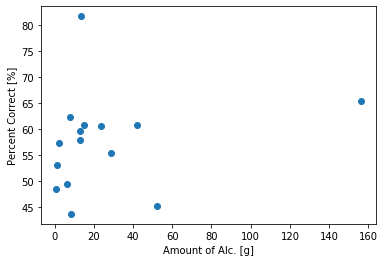

In [18]:
plt.scatter(li_amount_alc, li_alc)
plt.xlabel('Amount of Alc. [g]')
plt.ylabel('Percent Correct [%]')
plt.savefig('fig_alc.png')

SpearmanrResult(correlation=0.8982196964349441, pvalue=0.002438796796382353)

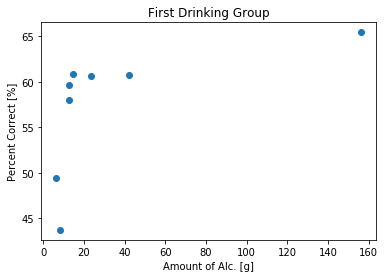

In [19]:
fd_amount_alc = first_drunk.iloc[:, [8]]
li_fd_amount_alc = list(fd_amount_alc.values.flatten())

plt.scatter(li_fd_amount_alc, li_fd_pc)
plt.title('First Drinking Group')
plt.xlabel('Amount of Alc. [g]')
plt.ylabel('Percent Correct [%]')
plt.savefig('fig_fd_relativity.png')
stats.spearmanr(li_fd_amount_alc, li_fd_pc)

SpearmanrResult(correlation=0.03571428571428572, pvalue=0.9394082054712856)

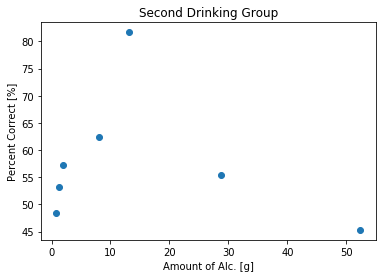

In [20]:
"""2回目飲酒群にアルコール量と正解率に相関があるか"""
sd_amount_alc = second_drunk.iloc[:, [9]]
li_sd_amount_alc = list(sd_amount_alc.values.flatten())

plt.scatter(li_sd_amount_alc, li_sd_pc_s)
plt.title('Second Drinking Group')
plt.xlabel('Amount of Alc. [g]')
plt.ylabel('Percent Correct [%]')
plt.savefig('fig_sd_relativity.png')
stats.spearmanr(li_sd_amount_alc, li_sd_pc_s) #アルコール量は正規分布に従っていないのでスピアマンの順位相関係数

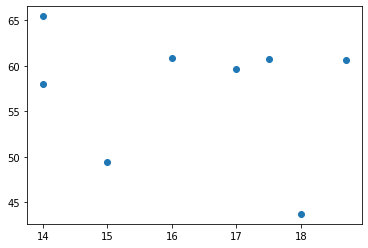

In [21]:
"""1回目飲酒群は時刻帯によって正解率の差があるか"""
fd_t = first_drunk.iloc[:, [10]]
li_fd_t = list(fd_t.values.flatten())

plt.scatter(li_fd_t, li_fd_pc)

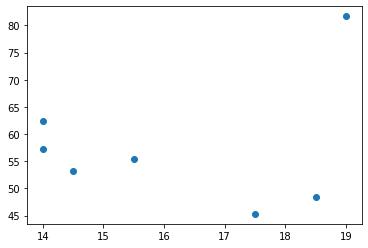

In [22]:
"""2回目飲酒群は時刻帯によって正解率の差があるか"""
sd_t = second_drunk.iloc[:, [11]]
li_sd_t = list(sd_t.values.flatten())

plt.scatter(li_sd_t, li_sd_pc_s)

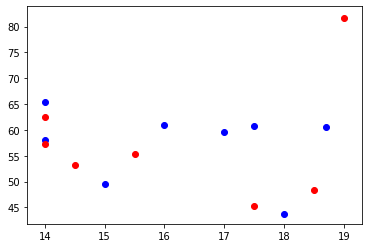

In [25]:
"""重ねる"""
plt.scatter(li_fd_t, li_fd_pc, c='b')
plt.scatter(li_sd_t, li_sd_pc_s, c='r')

In [ ]:
bias_data_e1 = pd.read_csv('e1d_bias.csv')
e1_bias1 = bias_data_e1.loc[:, 'bias1']
e1_bias2 = bias_data_e1.loc[:, 'bias2']

li_e1_bias1 = list(e1_bias1.values.flatten())
li_e1_bias2 = list(e1_bias2.values.flatten())


